In [1]:
# Exploratory Data Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_data = pd.read_csv('titanic_train.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

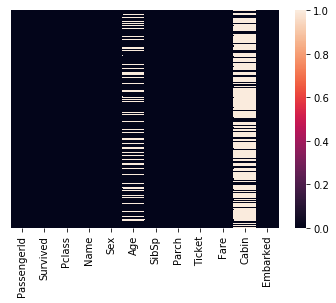

In [5]:
sns.heatmap(train_data.isnull(),yticklabels=False)

In [6]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

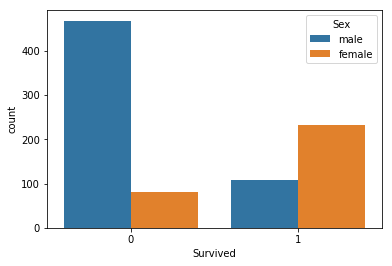

In [7]:
sns.countplot(x='Survived',hue='Sex',data=train_data)

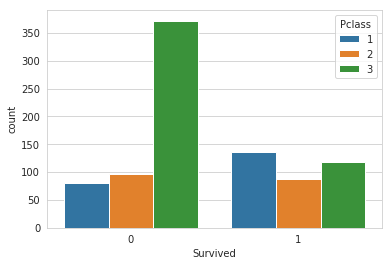

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train_data)

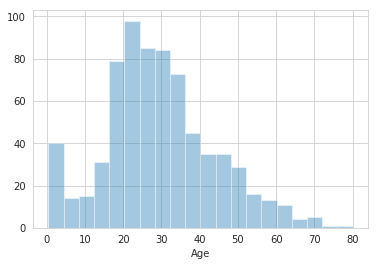

In [9]:
sns.distplot(train_data['Age'].dropna(),kde=False)

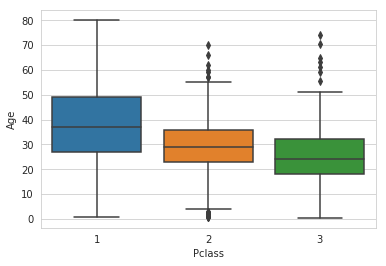

In [13]:
sns.boxplot(x='Pclass',y='Age',data=train_data)

In [14]:
def impute_age(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else :
            return 24
        
        
    else:
        return Age
    
    
    
    
    
    

In [15]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age,axis=1)

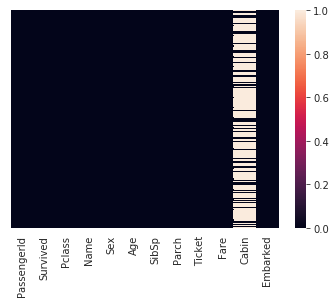

In [16]:
sns.heatmap(train_data.isnull(),yticklabels=False)

In [17]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
train_data.drop('Cabin',axis=1,inplace=True)

In [23]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


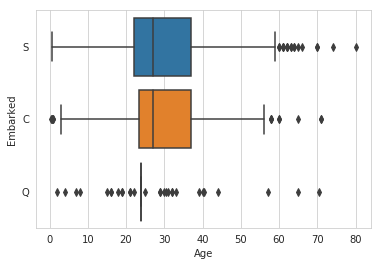

In [28]:
sns.boxplot(x='Age',y='Embarked',data=train_data)

In [29]:
def impute_Embar(col):
    Embarked = col[0]
    Age = col[1]
    
    if pd.isnull(Embarked):
        if Age == 27:
            return 'C'
        elif Age == 28:
            return 'S'
        else :
            return 'Q'
        
        
    else:
        return Embarked

In [30]:
train_data['Embarked'] = train_data[['Embarked','Age']].apply(impute_Embar,axis=1)

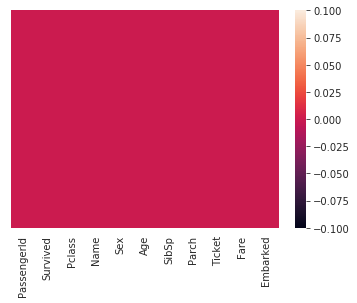

In [31]:
sns.heatmap(train_data.isnull(),yticklabels=False)

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [34]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     79
Name: Embarked, dtype: int64

In [37]:
embar = pd.get_dummies(train_data['Embarked'],drop_first=True)
sex = pd.get_dummies(train_data['Sex'],drop_first=True)

In [38]:
train_data.drop(['Sex','Embarked','Ticket','Name'],axis=1,inplace=True)

In [39]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [40]:
train_data = pd.concat([train_data,sex,embar],axis=1)

In [41]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
